In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Print shape of dataset
print("Training: {}".format(X_train.shape))
print("Test: {}".format(X_test.shape))

Training: (60000, 28, 28)
Test: (10000, 28, 28)


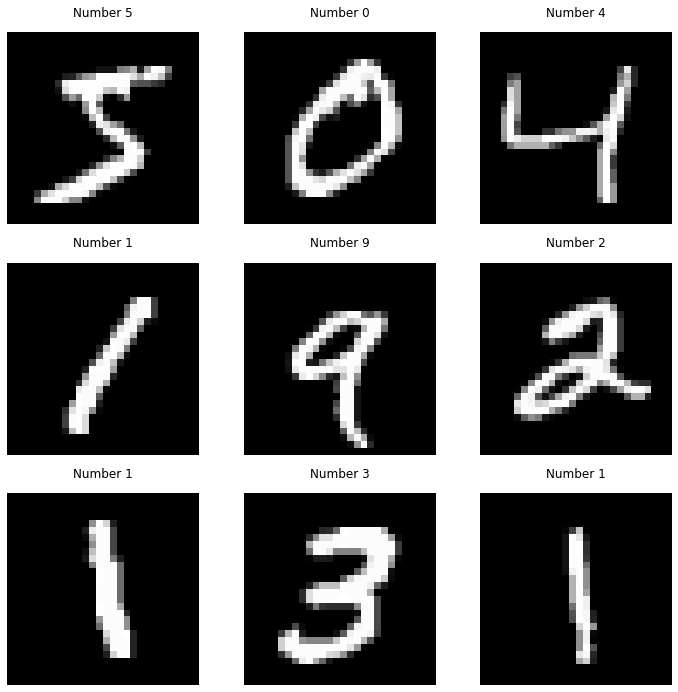

In [4]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
fig.show()

In [5]:
X_train[0:5]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
   

In [6]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

## Preprocessing

In [7]:
# Convert each image to 1d array (28x28 -> 784x1)
X_train = X_train.reshape(len(X_train), -1)
print(X_train.shape)

(60000, 784)


## Normalization

In [8]:
# Normalize the data to 0 - 1
X_train = X_train.astype(np.float32) / 255.

# Part 1

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components = 2)
X_train_2D=pca.fit_transform(X_train)

X_test = X_test.reshape(len(X_test), -1)
X_test = X_test.astype(np.float32) / 255.
X_test_2D=pca.fit_transform(X_test)



In [11]:
X_train_2D.shape

(60000, 2)

In [12]:
X_train_2D[0]

array([ 0.48596266, -1.2261755 ], dtype=float32)

In [13]:
X_test_2D.shape

(10000, 2)

## Comment

I used Python's PCA library from Sci-Kit Learn library so that i can reduce to dimension from 28x28 to 28x2

# Part 2

In [14]:
from scipy.spatial.distance import cdist
from sklearn.metrics import confusion_matrix #Confusion matrix function from scikit learn library
from sklearn.metrics import classification_report #Special library for getting classification report as a table
from sklearn import metrics

In [15]:
#Defining our function 
def kmeans(x,k, no_of_iterations,distance='euclidean'):
    idx = np.random.choice(len(x), k, replace=False)
    #print(idx)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
    #print(centroids)
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,distance) #Step 2
    #print(len(distances))
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,distance)
        #print(distances[_])
        points = np.array([np.argmin(i) for i in distances])
         
    return points

## Euclidean Distance

In [16]:
#Applying our function
y_pred = kmeans(X_train_2D,10,1000,'euclidean')

In [17]:
#report=classification_report(y_train, y_pred) #Preparing classification report
#print(report)
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Label:0', 'Label:1','Label:2','Label:3','Label:4', 'Label:5','Label:6','Label:7', 'Label:8','Label:9'], columns=['Cluster:0','Cluster:1', 'Cluster:2', 'Cluster:3','Cluster:4', 'Cluster:5', 'Cluster:6','Cluster:7', 'Cluster:8', 'Cluster:9']) #COnfusion Matrix of each K-fold Step
print(conf_matrix)
#print('Accuracy:% ',(metrics.accuracy_score(y_train, y_pred)*100))

         Cluster:0  Cluster:1  Cluster:2  Cluster:3  Cluster:4  Cluster:5  \
Label:0          9         98          1         25       2929       2170   
Label:1          7          0       5664        933          0          0   
Label:2        189         47        135        524        103       1025   
Label:3        111         15         63        567         54        294   
Label:4       1910       1233         16        485          4         17   
Label:5        299        144         48        982        111        847   
Label:6        166        640        102        678        107       1140   
Label:7       2517        450         76        679          0          3   
Label:8        172        139        163        810         73        569   
Label:9       2158        780         26        589         20         43   

         Cluster:6  Cluster:7  Cluster:8  Cluster:9  
Label:0         27        508        151          5  
Label:1        120         18          0    

In [18]:
def clusters_to_labels(confusion_matrix):
  marked_clusters_number=0
  cf=confusion_matrix.values
  marked_values=np.zeros((10,10))
  real_labels=np.zeros(10)
  marked_labels=[]
  marked_clusters=[]

  while marked_clusters_number is not 10:
    flat=cf.flatten()
    flat.sort()
    for i in range(1,100):
      largest=flat[-i]
      #print(largest)
      rows, cols=np.where(cf==largest) #Row and Column information of nth largest element in confusion matrix
      #print(rows[0],',',cols[0])
      #print(cf[rows[0]][cols[0]])
      if((cols[0] not in marked_clusters) and (rows[0] not in marked_labels)):
        marked_clusters.append(cols[0])
        marked_labels.append(rows[0])
        real_labels[cols[0]]=rows[0]
        marked_clusters_number=marked_clusters_number+1
        print('Cluster',cols[0],' = Label',rows[0])
      if(marked_clusters_number is 10):
        break
      #print(marked_values[rows[0]],',,',marked_values[:][cols[0]])
      #print(marked_clusters_number)
      #print(i)
      #print(marked_values)
      #print(real_labels)
      
  return real_labels

In [19]:
labels=clusters_to_labels(conf_matrix)
labels

Cluster 2  = Label 1
Cluster 4  = Label 0
Cluster 0  = Label 7
Cluster 8  = Label 3
Cluster 7  = Label 6
Cluster 9  = Label 9
Cluster 6  = Label 8
Cluster 1  = Label 4
Cluster 5  = Label 2
Cluster 3  = Label 5


array([7., 4., 1., 5., 0., 2., 8., 6., 3., 9.])

In [20]:
def match_clusters(y_pred,cf):
  real_labels=clusters_to_labels(cf)
  print(real_labels)
  for i in range(len(real_labels)):
    indices=y_pred[y_pred==i]
    y_pred[indices]=real_labels[i]
  return y_pred



In [21]:
y_pred=match_clusters(y_pred,conf_matrix)

Cluster 2  = Label 1
Cluster 4  = Label 0
Cluster 0  = Label 7
Cluster 8  = Label 3
Cluster 7  = Label 6
Cluster 9  = Label 9
Cluster 6  = Label 8
Cluster 1  = Label 4
Cluster 5  = Label 2
Cluster 3  = Label 5
[7. 4. 1. 5. 0. 2. 8. 6. 3. 9.]


In [22]:
print('Accuracy:% ',(metrics.accuracy_score(y_train, y_pred)*100))
cf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Label:0', 'Label:1','Label:2','Label:3','Label:4', 'Label:5','Label:6','Label:7', 'Label:8','Label:9'], columns=['Cluster:0','Cluster:1', 'Cluster:2', 'Cluster:3','Cluster:4', 'Cluster:5', 'Cluster:6','Cluster:7', 'Cluster:8', 'Cluster:9']) #COnfusion Matrix of each K-fold Step
print(cf)

Accuracy:%  8.295
         Cluster:0  Cluster:1  Cluster:2  Cluster:3  Cluster:4  Cluster:5  \
Label:0          9         98          1         25       2929       2170   
Label:1          7          0       5663        932          0          1   
Label:2        189         47        136        524        103       1025   
Label:3        111         15         63        567         54        293   
Label:4       1908       1234         16        485          4         17   
Label:5        299        144         48        982        111        847   
Label:6        166        640        102        678        107       1140   
Label:7       2517        450         76        679          0          3   
Label:8        172        139        163        810         73        569   
Label:9       2158        780         26        589         20         43   

         Cluster:6  Cluster:7  Cluster:8  Cluster:9  
Label:0         27        508        151          5  
Label:1        120        

##Cosine Distance

In [23]:
#Applying our function
y_pred = kmeans(X_train_2D,10,1000,'cosine')

In [24]:
#report=classification_report(y_train, y_pred) #Preparing classification report
#print(report)
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Label:0', 'Label:1','Label:2','Label:3','Label:4', 'Label:5','Label:6','Label:7', 'Label:8','Label:9'], columns=['Cluster:0','Cluster:1', 'Cluster:2', 'Cluster:3','Cluster:4', 'Cluster:5', 'Cluster:6','Cluster:7', 'Cluster:8', 'Cluster:9']) #COnfusion Matrix of each K-fold Step
print(conf_matrix)
#print('Accuracy:% ',(metrics.accuracy_score(y_train, y_pred)*100))

         Cluster:0  Cluster:1  Cluster:2  Cluster:3  Cluster:4  Cluster:5  \
Label:0         19         25         39         23        370         26   
Label:1       2617          2          0       4028          2         72   
Label:2        376        137        135        617        255       1264   
Label:3        389         68         55        655         73       1477   
Label:4        298       1857       1959         17        424          4   
Label:5        720        283        295        533        384        367   
Label:6        504        225        461        694       1239        421   
Label:7        507       2555       1211         56        101         11   
Label:8        526        199        276       1222        339       1101   
Label:9        398       2142       1524         34        252          6   

         Cluster:6  Cluster:7  Cluster:8  Cluster:9  
Label:0       4271         82         13       1055  
Label:1          2          5         12    

In [25]:
labels=clusters_to_labels(conf_matrix)
labels

Cluster 6  = Label 0
Cluster 3  = Label 1
Cluster 1  = Label 7
Cluster 7  = Label 3
Cluster 2  = Label 4
Cluster 8  = Label 9
Cluster 5  = Label 2
Cluster 4  = Label 6
Cluster 9  = Label 5
Cluster 0  = Label 8


array([8., 7., 4., 1., 6., 2., 0., 3., 9., 5.])

In [26]:
y_pred=match_clusters(y_pred,conf_matrix)

Cluster 6  = Label 0
Cluster 3  = Label 1
Cluster 1  = Label 7
Cluster 7  = Label 3
Cluster 2  = Label 4
Cluster 8  = Label 9
Cluster 5  = Label 2
Cluster 4  = Label 6
Cluster 9  = Label 5
Cluster 0  = Label 8
[8. 7. 4. 1. 6. 2. 0. 3. 9. 5.]


In [27]:
print('Accuracy:% ',(metrics.accuracy_score(y_train, y_pred)*100))
cf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Label:0', 'Label:1','Label:2','Label:3','Label:4', 'Label:5','Label:6','Label:7', 'Label:8','Label:9'], columns=['Cluster:0','Cluster:1', 'Cluster:2', 'Cluster:3','Cluster:4', 'Cluster:5', 'Cluster:6','Cluster:7', 'Cluster:8', 'Cluster:9']) #COnfusion Matrix of each K-fold Step
print(cf)

Accuracy:%  5.068333333333333
         Cluster:0  Cluster:1  Cluster:2  Cluster:3  Cluster:4  Cluster:5  \
Label:0         19         25         39         23        370         26   
Label:1       2616          3          0       4027          2         72   
Label:2        376        137        136        617        254       1264   
Label:3        389         68         55        656         73       1477   
Label:4        298       1855       1959         17        425          5   
Label:5        720        283        295        533        384        367   
Label:6        504        225        461        694       1239        421   
Label:7        507       2555       1211         56        101         11   
Label:8        526        199        276       1222        339       1101   
Label:9        398       2141       1524         34        252          6   

         Cluster:6  Cluster:7  Cluster:8  Cluster:9  
Label:0       4270         83         13       1055  
Label:1       

##City Blocks

In [28]:
#Applying our function
y_pred = kmeans(X_train_2D,10,1000,'cityblock')

In [29]:
#report=classification_report(y_train, y_pred) #Preparing classification report
#print(report)
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Label:0', 'Label:1','Label:2','Label:3','Label:4', 'Label:5','Label:6','Label:7', 'Label:8','Label:9'], columns=['Cluster:0','Cluster:1', 'Cluster:2', 'Cluster:3','Cluster:4', 'Cluster:5', 'Cluster:6','Cluster:7', 'Cluster:8', 'Cluster:9']) #COnfusion Matrix of each K-fold Step
print(conf_matrix)
#print('Accuracy:% ',(metrics.accuracy_score(y_train, y_pred)*100))

         Cluster:0  Cluster:1  Cluster:2  Cluster:3  Cluster:4  Cluster:5  \
Label:0          7       1555         19        534         25          9   
Label:1          0          1          0          6         65        142   
Label:2         63       1362         12        715       1515        286   
Label:3         27        530          5        235       2291        219   
Label:4       2136          6       1673        383          1       1458   
Label:5        174       1114         37        923        492        444   
Label:6         94       1065        198       1927        285        196   
Label:7       2849          1        932        227          6       1911   
Label:8         89        793         64        805       1062        227   
Label:9       2415         32       1264        264          3       1679   

         Cluster:6  Cluster:7  Cluster:8  Cluster:9  
Label:0       3445          4        201        124  
Label:1          0       6379          0    

In [30]:
labels=clusters_to_labels(conf_matrix)
labels

Cluster 7  = Label 1
Cluster 6  = Label 0
Cluster 0  = Label 7
Cluster 4  = Label 3
Cluster 9  = Label 8
Cluster 3  = Label 6
Cluster 5  = Label 9
Cluster 2  = Label 4
Cluster 1  = Label 2
Cluster 8  = Label 5


array([7., 2., 4., 6., 3., 9., 0., 1., 5., 8.])

In [31]:
y_pred=match_clusters(y_pred,conf_matrix)

Cluster 7  = Label 1
Cluster 6  = Label 0
Cluster 0  = Label 7
Cluster 4  = Label 3
Cluster 9  = Label 8
Cluster 3  = Label 6
Cluster 5  = Label 9
Cluster 2  = Label 4
Cluster 1  = Label 2
Cluster 8  = Label 5
[7. 2. 4. 6. 3. 9. 0. 1. 5. 8.]


In [32]:
print('Accuracy:% ',(metrics.accuracy_score(y_train, y_pred)*100))
cf = pd.DataFrame(confusion_matrix(y_train, y_pred), index=['Label:0', 'Label:1','Label:2','Label:3','Label:4', 'Label:5','Label:6','Label:7', 'Label:8','Label:9'], columns=['Cluster:0','Cluster:1', 'Cluster:2', 'Cluster:3','Cluster:4', 'Cluster:5', 'Cluster:6','Cluster:7', 'Cluster:8', 'Cluster:9']) #COnfusion Matrix of each K-fold Step
print(cf)

Accuracy:%  2.395
         Cluster:0  Cluster:1  Cluster:2  Cluster:3  Cluster:4  Cluster:5  \
Label:0          7       1555         20        534         25          9   
Label:1          1          1          0          6         65        143   
Label:2         63       1362         12        714       1515        286   
Label:3         27        530          5        235       2291        219   
Label:4       2135          6       1673        383          2       1457   
Label:5        174       1114         37        923        491        444   
Label:6         94       1065        198       1927        285        196   
Label:7       2849          1        932        227          6       1911   
Label:8         89        793         64        805       1062        227   
Label:9       2414         32       1264        265          3       1679   

         Cluster:6  Cluster:7  Cluster:8  Cluster:9  
Label:0       3444          4        201        124  
Label:1          1       6

## Comment

Highest Accuracy of KMeans algorithm has achieved with Euclidean Distance for this problem